In [12]:
pwd

'c:\\Users\\cutic\\OneDrive\\Escritorio\\Tecnológico de Monterrey\\Octavo semestre\\Desarrollo de aplicaciones avanzadas de ciencias computacionales\\IAModulo2'

# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



base_dir = os.path.abspath(os.getcwd())

print(base_dir)

train_dir = os.path.join(base_dir,'pandaorbear')
train_dir = os.path.join(train_dir,'Train')
print(train_dir)
test_dir = os.path.join(base_dir,'pandaorbear')
test_dir = os.path.join(test_dir, 'Test')
print(test_dir)
train_datagen = ImageDataGenerator(
							rescale = 1./255,
                            #Agregar rotación aporta variablidad y ayuda a que el modelo sea capaz de reconocer al animal en diferentes orientaciones
							rotation_range = 30,
                            #Hacer estos cambios de posición hacen que el modelo pueda identificar mejor al objeto posicionado en distintas partes de la imagen
							width_shift_range = 0.2,
							height_shift_range = 0.2,
                            #este parametro distorsiona la imagen extendiendola (tilting) hacia un lado. nos puede ayudar a identificar las imagenes en esccenarios de movimiento
							shear_range = 0.2,
                            #Esto ayuda a poder reconocer los animales a diferentes escalas de tamaño en la imagen
							zoom_range = 0.3,
                            #Invertir la imagen ayuda a tener mas variedad de posicionamiento, para poder clasificar mejor en disitntas posiciones
							horizontal_flip = True,)
							



c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear\Train
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear\Test


En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 500 images belonging to 2 classes.
(8, 150, 150, 3)
[0. 0. 0. 0. 1. 0. 1. 0.]


<Figure size 432x288 with 0 Axes>

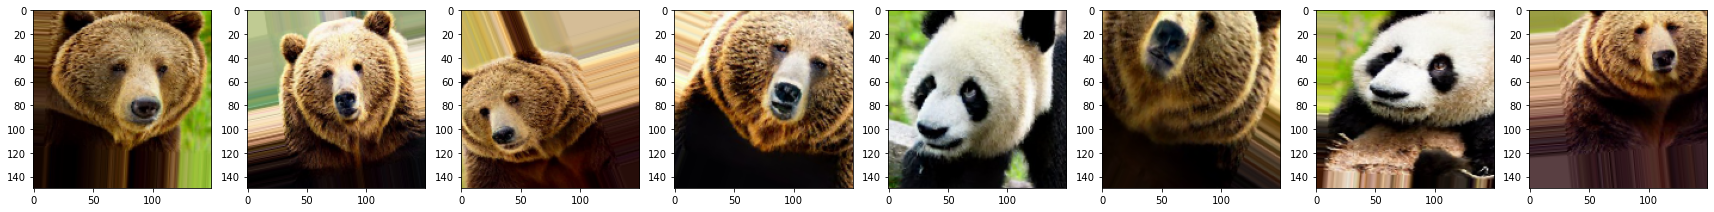

In [14]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

Esta es una red neuronal convolutiva:

In [25]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_4 (Flatten)         (None, 219040)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               28037248  
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28,054,169
Trainable params: 28,054,169
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
63/63 [==============================] - 14s 208ms/step - loss: 0.4175 - acc: 0.8120
Epoch 2/10
63/63 [==============================] - 13s 207ms/step - loss: 0.1911 - acc: 0.9460
Epoch 3/10
63/63 [==============================] - 13s 206ms/step - loss: 0.1554 - acc: 0.9460
Epoch 4/10
63/63 [==============================] - 14s 221ms/step - loss: 0.1262 - acc: 0.9600
Epoch 5/10
63/63 [==============================] - 14s 224ms/step - loss: 0.1232 - acc: 0.9660
Epoch 6/10
63/63 [==============================] - 14s 215ms/step - loss: 0.1321 - acc: 0.9520
Epoch 7/10
63/63 [==============================] - 15s 233ms/step - loss: 0.0860 - acc: 0.9680
Epoch 8/10
63/63 [==============================] - 14s 219ms/step - loss: 0.1004 - acc: 0.9740
Epoch 9/10
63/63 [==============================] - 14s 216ms/step - loss: 0.0835 - acc: 0.9780
Epoch 10/10
63/63 [==============================] - 13s 208ms/step - loss: 0.0817 - acc: 0.9840


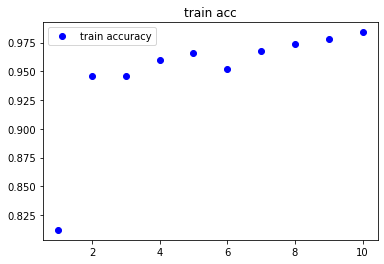

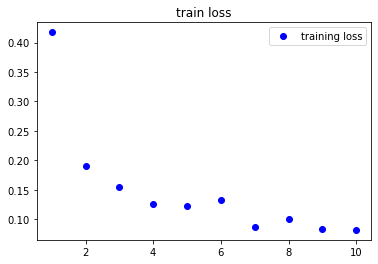

In [26]:

history = model.fit(
						train_generator, 
						epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [28]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 5,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
10/10 [==============================] - 0s 15ms/step - loss: 4.3677 - acc: 0.9800

test acc :
 0.9800000190734863


In [29]:
from tensorflow import keras
from tensorflow.keras import layers 

In [33]:
# Instanciamos Mobile Net v2
model = keras.applications.MobileNetV2(include_top=True)

# No utilizaremos el entrenamiento que viene por default en el modelo
model.trainable=False

# Definimos nuestros inputs como los mismos que trae el modelo
inputs=model.layers[0].input

# Conectamos nuestro nuevo output layer con todo nuestro modelo a excepción del output layer original
out=model.layers[-2].output

# Ahora agregamos una capa densa en la capa de output que nos interpretará las 2 clases existentes 
outputs=layers.Dense(1)(out)

# Instanciamos un nuevo modelo y lo llenamos con lo definido previamente 
second_model = keras.Model(inputs,outputs)

# Compilamos el modelo utilizando el optimizador Adam, así como una función de pérdida para funciones sparse categorical (multiples)
second_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.BinaryCrossentropy(from_logits=True)],
    metrics=["accuracy"],
)

In [34]:
#Entrenamiento con 10 épocas


model2_fit = second_model.fit(
						train_generator, 
						epochs = 10)
				

Epoch 1/10
63/63 [==============================] - 19s 219ms/step - loss: 0.0605 - accuracy: 0.9760
Epoch 2/10
63/63 [==============================] - 6s 95ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 3/10
63/63 [==============================] - 6s 99ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/10
63/63 [==============================] - 7s 107ms/step - loss: 8.7196e-04 - accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 7s 105ms/step - loss: 7.7572e-04 - accuracy: 1.0000
Epoch 6/10
63/63 [==============================] - 6s 101ms/step - loss: 4.6477e-04 - accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 6s 99ms/step - loss: 3.5717e-04 - accuracy: 1.0000
Epoch 8/10
63/63 [==============================] - 6s 96ms/step - loss: 4.9244e-04 - accuracy: 1.0000
Epoch 9/10
63/63 [==============================] - 6s 99ms/step - loss: 2.9525e-04 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 7s 117ms/step - loss: 2.491